
## CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread   # bu library import edilecek.
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\ContraVolta\\Desktop\\GithupUpload\\01_DATA_SCIENCE_NOTEBOOKS\\09_Deep_Learning'

In [3]:
my_data_dir = 'C:\\Users\\ContraVolta\\Desktop\\GithupUpload\\01_DATA_SCIENCE_NOTEBOOKS\\09_Deep_Learning\\cell'

In [4]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 
# kabaca çift tıklama gibi, 2 kere tıkla 

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'   # çift sl.önemli test i de ekledik + ile
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)   # arı ayrı enfekte olan ve olmayan lar var.

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)  # arı ayrı enfekte olan ve olmayan lar var.

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'\\parasitized') # açma işlemi yaptık, ilgili kalsörü gördüm iç kısmını.

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
os.listdir(train_path+'\\parasitized')[7] # 7. getir bakalım ne var.

'C100P61ThinF_IMG_20150918_144104_cell_169.png'

In [10]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_169.png'
# train in içinden aldık, bakalım ne

In [11]:
imread(para_cell)  # n dim 3 olduğu için RGB renkli....

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [13]:
para_img= imread(para_cell)  # değişkene atadık 

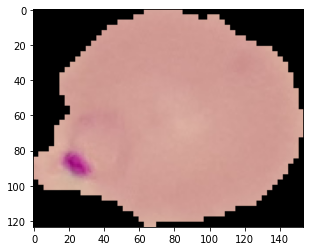

In [14]:
plt.imshow(para_img)
# koyu nokta enfekte olduğunu gösterir, bizde baktık resme. cnn için faaliyete girmedik henüz.

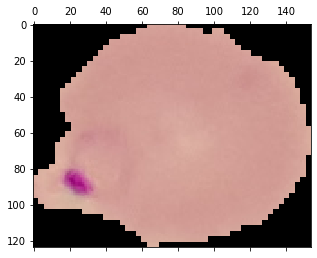

In [15]:
plt.matshow(para_img);

In [16]:
para_img.shape  # shape 124*154 3 demekte renkliydi.

(124, 154, 3)

In [17]:
os.listdir(train_path+'\\uninfected')  # nfekte olmayana bakalım

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [18]:
uninfected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[7]  # 7.

In [19]:
imread(uninfected_cell_path)  # RGB olan renkli

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

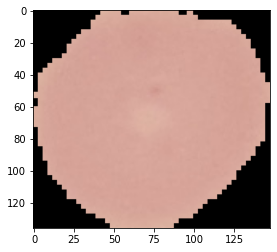

In [20]:
unifected_cell = imread(uninfected_cell_path)
plt.imshow(unifected_cell)  # enfekte olmayan üzre girdik kyu bölge yok enfekte yok
# model okuma yapacak enfekte olmayan renk koyuluğu yoksa temiz denebilir. healtcare cnn ve ann alanına bakılabilir.

**Let's check how many images there are.**

In [21]:
len(os.listdir(train_path+'\\parasitized')) 
# ilgili pah te 12480 enfekte durumu var.

12480

In [22]:
len(os.listdir(train_path+'\\uninfected'))
# ilgili pah te 12480 enfekte olmayan durumu var.

12480

**Let's find out the average dimensions of these images.**

In [23]:
unifected_cell.shape  # farklı düzeydekileri tek boyuta indirelim.
# yukarıda naktığım farklıydı. modele bu şekilde sokamam

(136, 148, 3)

In [24]:
para_img.shape

(124, 154, 3)

In [25]:
x= []
y = []
for image in os.listdir(test_path+'\\uninfected'):  # her bir image için tek tek değerlere bakacak.
    
    img = imread(test_path+'\\uninfected'+'\\'+image)
    d1,d2,colors = img.shape  # unpacking yaptık
    x.append(d1)  # d1 i X e 
    y.append(d2)  # d2 yi de Y ye atadım

In [26]:
x, y

([118,
  172,
  130,
  163,
  172,
  139,
  151,
  160,
  145,
  127,
  121,
  154,
  145,
  127,
  154,
  151,
  148,
  130,
  160,
  136,
  139,
  190,
  127,
  133,
  136,
  124,
  151,
  151,
  151,
  160,
  118,
  154,
  154,
  121,
  127,
  118,
  130,
  124,
  163,
  88,
  139,
  127,
  121,
  139,
  166,
  133,
  124,
  154,
  139,
  127,
  124,
  136,
  166,
  133,
  145,
  157,
  181,
  148,
  112,
  124,
  112,
  106,
  121,
  148,
  148,
  112,
  121,
  148,
  97,
  112,
  142,
  118,
  130,
  151,
  133,
  136,
  115,
  145,
  115,
  142,
  136,
  130,
  142,
  124,
  142,
  136,
  166,
  148,
  136,
  142,
  133,
  130,
  139,
  124,
  139,
  121,
  130,
  142,
  133,
  118,
  157,
  127,
  109,
  112,
  139,
  142,
  142,
  112,
  118,
  100,
  127,
  145,
  136,
  160,
  187,
  130,
  130,
  157,
  130,
  130,
  151,
  175,
  145,
  136,
  157,
  133,
  127,
  154,
  133,
  151,
  130,
  136,
  160,
  130,
  139,
  145,
  145,
  145,
  154,
  133,
  160,
  142,
  157,
 

<AxesSubplot:>

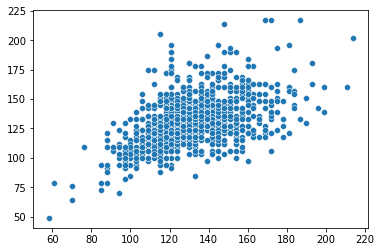

In [27]:
sns.scatterplot(x,y)  # x ve y değerlerini bakalım.

In [28]:
np.mean(x)
# x ekseni piksel ort. bakalım

130.92538461538462

In [29]:
np.mean(y)
# y ekseni piksel ort. bakalım

130.75

In [30]:
image_shape = (130,130,3)
# değişken atadım bunu kullanacağım.
# image_shape = (130,130,3)
# tüm fotoğrafların boyutunu ortalama değere yakın bir değere eşitledim.
# 130a 130 dan küçük olan imagelerin kenarlarını 0 lar ile dolduracak
# bundan büyük olan imageleri 130a 130 olacak şekilde kırpacak.
# bu durumda enfekte olmuş alan kenar bölgelere yakın ise kırpıldığında bunun atılma riski var .
# imagelerde kenarlarda enfekte alanlar olup olmadığına bakılıp boyutu ona göre ayarlanabilir

## Preparing the Data for the model

In [31]:
unifected_cell.max()
# scalinge gerek var mı bakalım 0-255 arası rakam olacakı.önceden scale edilmiş onu anladım

0.88235295

In [34]:
unifected_cell.min()

0.0

In [32]:
para_img.max()
# enfekte durumlarına bakalım

0.8901961

In [33]:
para_img.min()

0.0

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# aynı image nin farklı olanlarını üretecek, sağda kedi solda kedi feyk data üretecek,
# bir nevi SMOTE target label azsa artırıp bakalım denebilir. ImageDataGenerator burada bunu kul

In [35]:
#help(ImageDataGenerator)

hocam  neden imagedatagenerator kullanmıyoruz<br>
burada image'lerimiz bizim elimizde değil, Keras'ın hazır datasından faydalanıyoruz. Bu nedenle kullanamıyoruz.<br>
anladım hocam. methodlarını denemiştim ama bir türlü becerememiştim<br>

Image data generator hakkında genel bilgi:<br>
Şöyle ki derste yaptığımız data image generator uygulamasında her orjinal resimden 1'er adet fake resim üretiliyor ve bu fake resimler sadece modele sokuluyor (orjinal resimler kullanılmıyor). Bunun amacı: genelde datasetler için hazırlanan resimler hep düzgün önden çekilmiş resimler. Bu resimleri biraz döndürerek, kırparak, vb. gerçek hayattamodelin karşılaşabileceği düzgün olmayan resimler haline dönüştürmek. Resimleri çoğaltmak için yapılması gereken farklı işlemler mevcut.<br>

Hocam Matt hoca batch size eğer 16 ise 1 tane orjinal 15 tane fake fotoğraf sokuluyor demişti diye hatırlıyorum.<br>
Evet öyle demiştik ama düzeltme yapıyoruz o konuda<br>

Anladım hocam. Peki hocam fit ile fit_generator arasındaki fark da fotoğraf üretmesiyle mi alakalı<br>
evet<br>


In [39]:
image_gen = ImageDataGenerator(rotation_range=15,      # elimdekileri kaç derce çevireyim 15 sağa sola
                               width_shift_range=0.10,  # genişliğini yuzde 10 büyütüp küçültür.
                               height_shift_range=0.10, # yükekliğini yuzde 10 büyütüp küçültür.
                               #rescale=1/255,            #rescale=1/255, yapıldığından dolayı bir adaha yapmadık. 
                               shear_range=0.1,           # parça almak anllamında.
                               zoom_range=0.1,            # zoom eder o oranda
                               horizontal_flip=True,      # zoom eder o oranda
                               fill_mode='nearest')       # alan boş kalanınca shear olunca dolur yandakilerle.

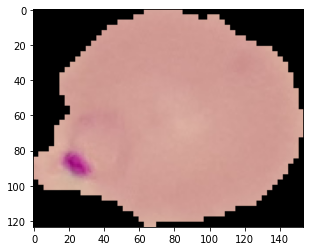

In [40]:
plt.imshow(para_img)  # bu image random uyg.

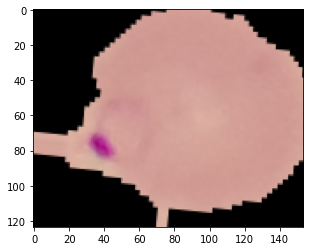

In [41]:
plt.imshow(image_gen.random_transform(para_img))
# bir dtane daha enfekte olan data ürettim. arada  fark var. Bu daahince burunlu gibi

In [42]:
image_gen.flow_from_directory(train_path)
# ço kullanılmayacak şu kadar image var 2 class var.  0 ve 1  farklı klasörde. neyi nerden alacaks atrain setinin içinde  ayrı ayrı oalcak.
# kedi köpek tavşan olsa kaç farklı varsa  ilgili kalsöre konulmalı

Found 24958 images belonging to 2 classes.


In [43]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D # max pool da aynı şey

In [45]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
#  kernel_size=(3,3) filte bunu belirledik
# input_shape=image_shape 130 *130 *3 büyükleri kırp gibi.
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# conv bitti

model.add(Flatten())
# ann deki layer lar

model.add(Dense(128))
model.add(Activation('relu'))# neden layer conv. layerda 1 ve 0 varmı yokmu?istikrarklıdır. relu öğrenmeyi hızandırıyor.

model.add(Dropout(0.5)) # noronların yarısını kapat

model.add(Dense(1))
model.add(Activation('sigmoid'))  # 2 olduğu için  sigmoid yaptık

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # aprametreler bunlar.

In [46]:
model.summary()  # dense layer çok arttı 1.662.209 parametre var.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Early Stopping

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) # patient sayısı önemli 

## Training the Model

In [46]:
#help(image_gen.flow_from_directory)  # bir iamge den ir çok image yapalım

In [49]:
batch_size = 16  # önemli küçük olursa her iterasyonda daha az modele girer, yüksek olursa işlemciye dikkat.
train_image_gen = image_gen.flow_from_directory(train_path,                   # image jen. den image path inden 16 lık al
                                               target_size=image_shape[:2],   # image ler 130*130 olarak al
                                                color_mode='rgb',             # image 3 burada belirt.
                                               batch_size=batch_size,         # 16 lık 
                                               class_mode='binary')           # binary class.
# her resimden 16 farklı İMAGE ÜRET.

Found 24958 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)  # test imageler shuffle=False karıştırma.
                                                                  # her epoch'ta datayı dağıtıyor shuffle

Found 2600 images belonging to 2 classes.


In [51]:
train_image_gen.class_indices  # parazitli olana 0! sağlıklı 1 demek dedi model.

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,  # değişkene atadık kullanmak için 
                              validation_data=test_image_gen, callbacks=[early_stop])
# fit_generator bir methot.
# 5 ten 6 ya geçerken 60 dan 90 a geçmiş.

Epoch 1/20
1560/1560 [==============================] - 557s 357ms/step - loss: 0.8437 - accuracy: 0.5483 - val_loss: 0.6793 - val_accuracy: 0.5788
Epoch 2/20
1560/1560 [==============================] - 422s 271ms/step - loss: 0.6813 - accuracy: 0.5809 - val_loss: 0.6835 - val_accuracy: 0.5523
Epoch 3/20
1560/1560 [==============================] - 420s 269ms/step - loss: 0.6814 - accuracy: 0.5746 - val_loss: 0.6780 - val_accuracy: 0.5854
Epoch 4/20
1560/1560 [==============================] - 419s 268ms/step - loss: 0.6782 - accuracy: 0.5919 - val_loss: 0.6675 - val_accuracy: 0.5992
Epoch 5/20
1560/1560 [==============================] - 422s 271ms/step - loss: 0.6647 - accuracy: 0.6039 - val_loss: 0.6777 - val_accuracy: 0.6054
Epoch 6/20
1560/1560 [==============================] - 389s 249ms/step - loss: 0.5309 - accuracy: 0.7227 - val_loss: 0.2485 - val_accuracy: 0.9169
Epoch 7/20
1560/1560 [==============================] - 386s 247ms/step - loss: 0.2351 - accuracy: 0.9244 - val_

# Evaluating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

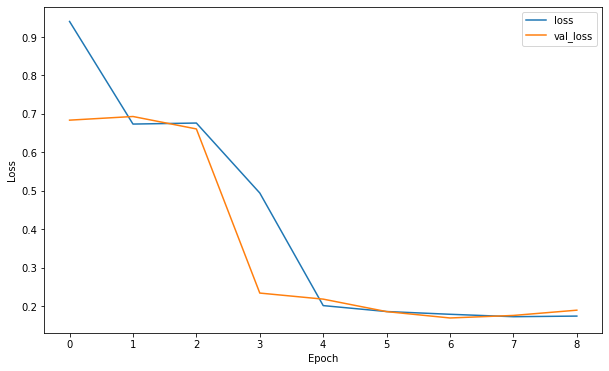

In [49]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

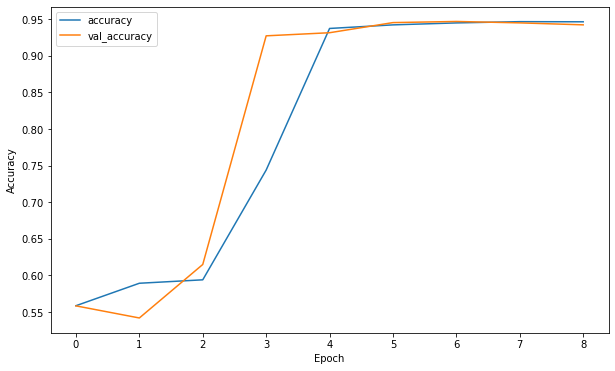

In [50]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.18758432567119598, 0.9415384531021118]

In [53]:
from tensorflow.keras.preprocessing import image

In [56]:
preds = model.predict_generator(test_image_gen)

In [57]:
preds

array([[7.3027611e-04],
       [1.3345480e-04],
       [5.0622225e-04],
       ...,
       [9.3722165e-01],
       [9.2190099e-01],
       [8.9376175e-01]], dtype=float32)

In [58]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
predictions = preds > 0.5

In [61]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [64]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1225,   75],
       [  71, 1229]], dtype=int64)

In [65]:
#model.save('malaria_model.h5')

# Predicting on an Image

In [66]:
para_cell

'C:\\Users\\msmsk\\custom_images\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_169.png'

In [67]:
my_image = image.load_img(para_cell,target_size=image_shape)

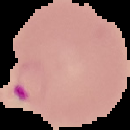

In [68]:
my_image

In [69]:
type(my_image)

PIL.Image.Image

In [70]:
my_image = image.img_to_array(my_image)

In [71]:
type(my_image)

numpy.ndarray

In [72]:
my_image.shape

(130, 130, 3)

In [73]:
my_image = np.expand_dims(my_image, axis=0)

In [74]:
my_image.shape

(1, 130, 130, 3)

In [75]:
model.predict(my_image)

array([[2.5258192e-05]], dtype=float32)

In [76]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [77]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}